In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import altair as alt

## Baseline Model

In [3]:
# read in the confusion matrices
cm_train = pd.read_csv('../../data/ml-data/matt-submissions-cv-train-cm-baseline.csv')
cm_test = pd.read_csv('../../data/ml-data/matt-submissions-cv-test-cm-baseline.csv')

### Visualize Using Seaborn

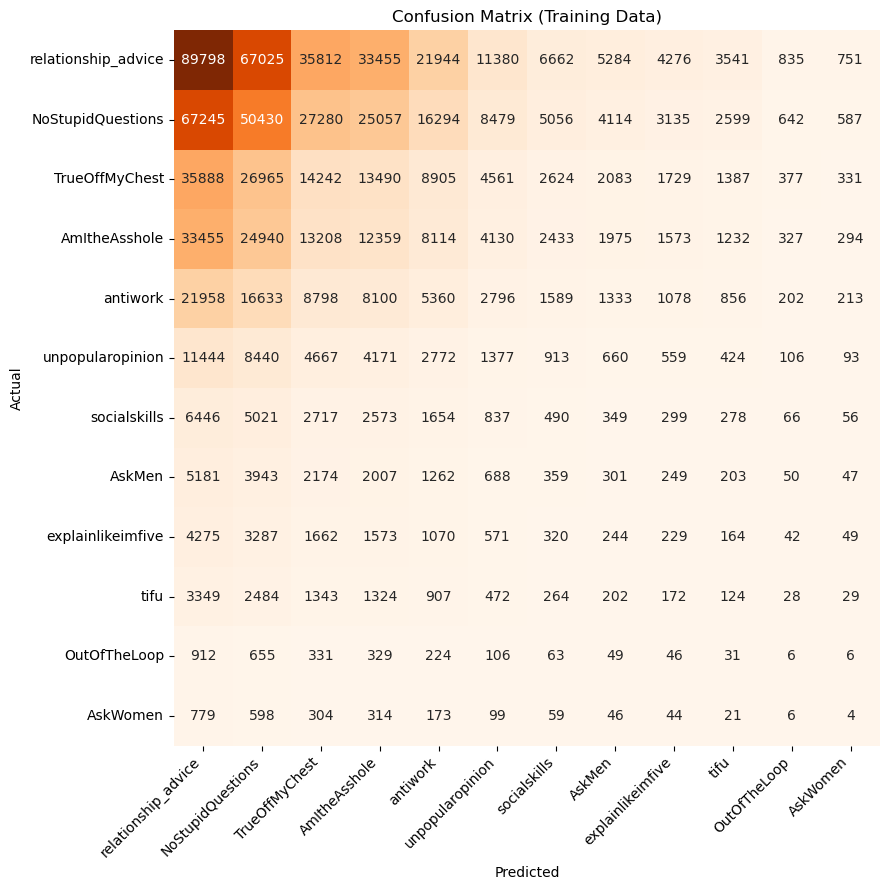

In [5]:
plt.figure(figsize = (9, 9))
sns.heatmap(cm_train.to_numpy(), annot = True, fmt = 'd', cmap = 'Oranges', cbar = False,
            xticklabels = cm_train.columns,
            yticklabels = cm_train.columns)
plt.xlabel('Predicted'); plt.ylabel('Actual'); plt.title('Confusion Matrix (Training Data)');
plt.xticks(rotation = 45, ha = 'right')
plt.tight_layout()
plt.savefig('../../website-source/img/ml-plots/random-forest-cv-train-cm-baseline.png')
plt.show()

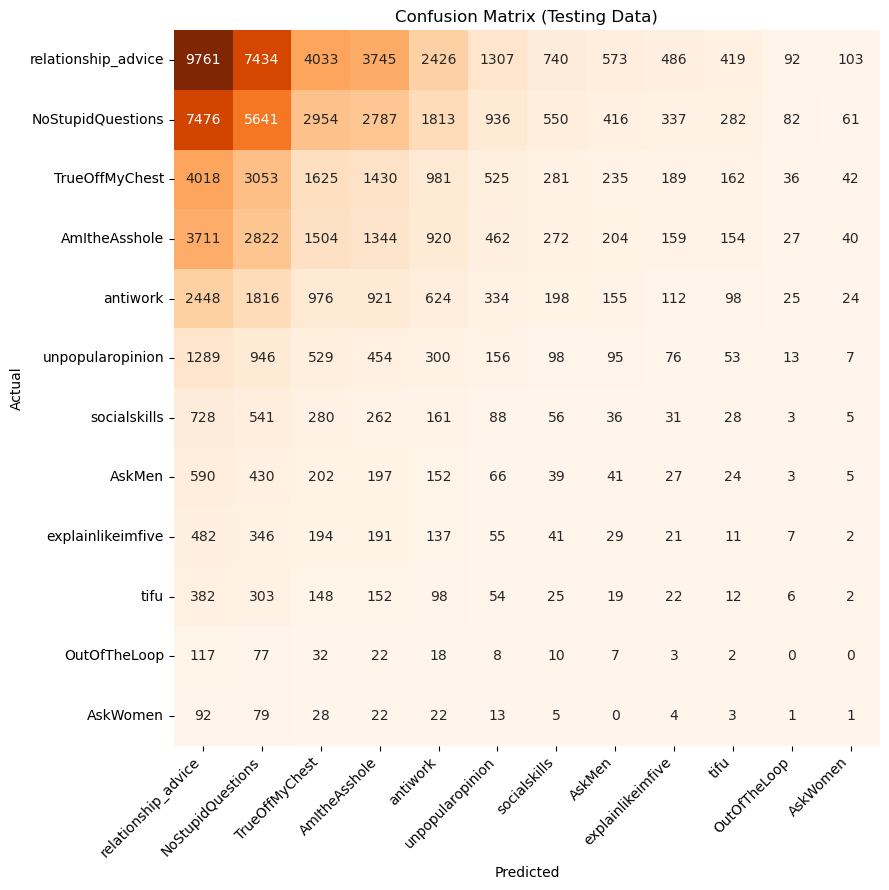

In [6]:
plt.figure(figsize = (9, 9))
sns.heatmap(cm_test.to_numpy(), annot = True, fmt = 'd', cmap = 'Oranges', cbar = False,
            xticklabels = cm_test.columns,
            yticklabels = cm_test.columns)
plt.xlabel('Predicted'); plt.ylabel('Actual'); plt.title('Confusion Matrix (Testing Data)');
plt.xticks(rotation = 45, ha = 'right')
plt.tight_layout()
plt.savefig('../../website-source/img/ml-plots/random-forest-cv-test-cm-baseline.png')
plt.show()

### Random Forest Evaluation Metrics

In [7]:
# read in the evaluation metrics
eval_df = pd.read_csv('../../data/ml-data/matt-submissions-cv-eval-metrics-baseline.csv')
eval_df

,dataset,metric,value
0,train,accuracy,0.198662
1,test,accuracy,0.197365
2,train,f1,0.198702
3,test,f1,0.197340
4,train,precision,0.198742
5,test,precision,0.197318
6,train,recall,0.198662
7,test,recall,0.197365
8,train,tprate,0.198662
9,test,tprate,0.197365


In [8]:
domain_ = ['train', 'test']
range_ = ['#ff4500', '#7a9299'] # orca: 1b2426

# create the selection and color scheme for interaction
selection = alt.selection_single(fields = ['dataset'], name = 'Random')
color = alt.condition(selection,
                      alt.Color('dataset:N', scale=alt.Scale(domain=domain_, range=range_)),
                      alt.value('lightgray'))

# create the figure
bar = (alt.Chart(eval_df, width = 150)
 .mark_bar()
 .encode(y = alt.Y('value:Q', scale = alt.Scale(domain=[0, 1])),
         x = alt.X('dataset:N', sort = ['train', 'test']),
         color = color,
         column = alt.Column('metric:N', header = alt.Header(labelAngle = 0, labelOrient = 'top'))
        )
).add_selection(selection)

bar.title = 'Random Forest Evaluation Metrics'
bar.encoding.x.title = 'Dataset'
bar.encoding.y.title = 'Evaluation'

random_forest_eval = (bar).configure_view(strokeOpacity = 0).configure_axis(
    labelFontSize = 12,
    titleFontSize = 12
).configure_title(
    fontSize = 16
)

random_forest_eval

/Users/matthewmoriarty/opt/anaconda3/envs/anly503/lib/python3.10/site-packages/altair/utils/core.py:317: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for col_name, dtype in df.dtypes.iteritems():


alt.Chart(...)

In [9]:
# save off to HTML for use in visualizations page
random_forest_eval.save('../../website-source/img/ml-plots/random-forest-eval-baseline.html')

## True Model

In [10]:
# read in the confusion matrices
cm_train = pd.read_csv('../../data/ml-data/matt-submissions-cv-train-cm.csv')
cm_test = pd.read_csv('../../data/ml-data/matt-submissions-cv-test-cm.csv')

### Visualize Using Seaborn

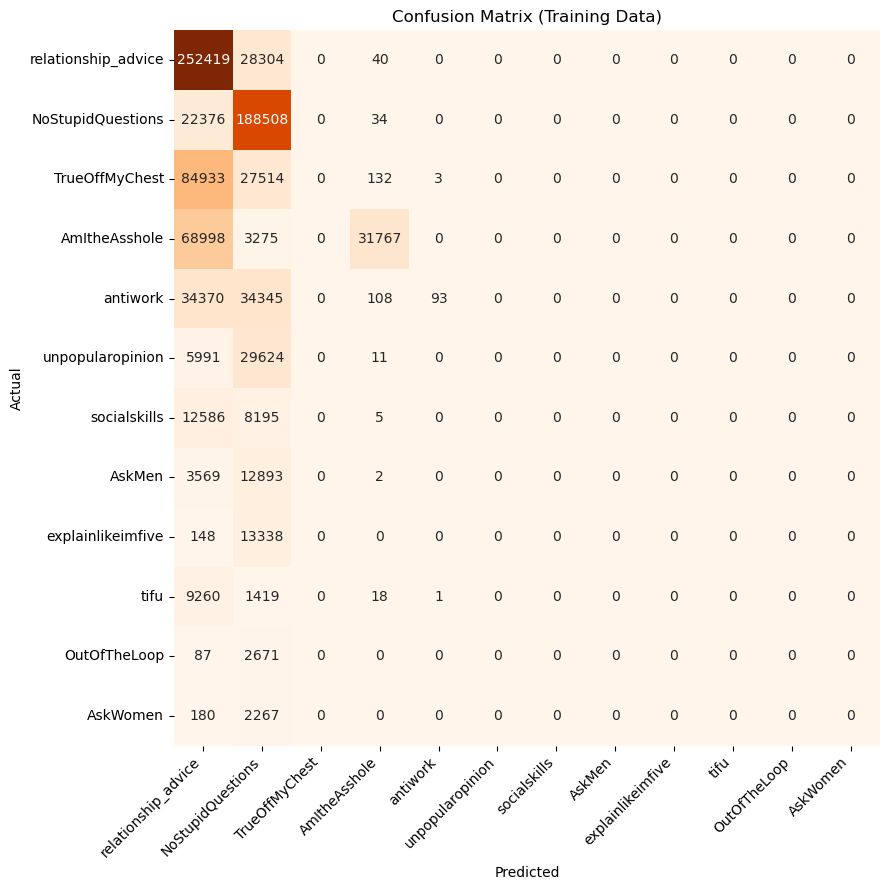

In [11]:
plt.figure(figsize = (9, 9))
sns.heatmap(cm_train.to_numpy(), annot = True, fmt = 'd', cmap = 'Oranges', cbar = False,
            xticklabels = cm_train.columns,
            yticklabels = cm_train.columns)
plt.xlabel('Predicted'); plt.ylabel('Actual'); plt.title('Confusion Matrix (Training Data)');
plt.xticks(rotation = 45, ha = 'right')
plt.tight_layout()
plt.savefig('../../website-source/img/ml-plots/random-forest-cv-train-cm.png')
plt.show()

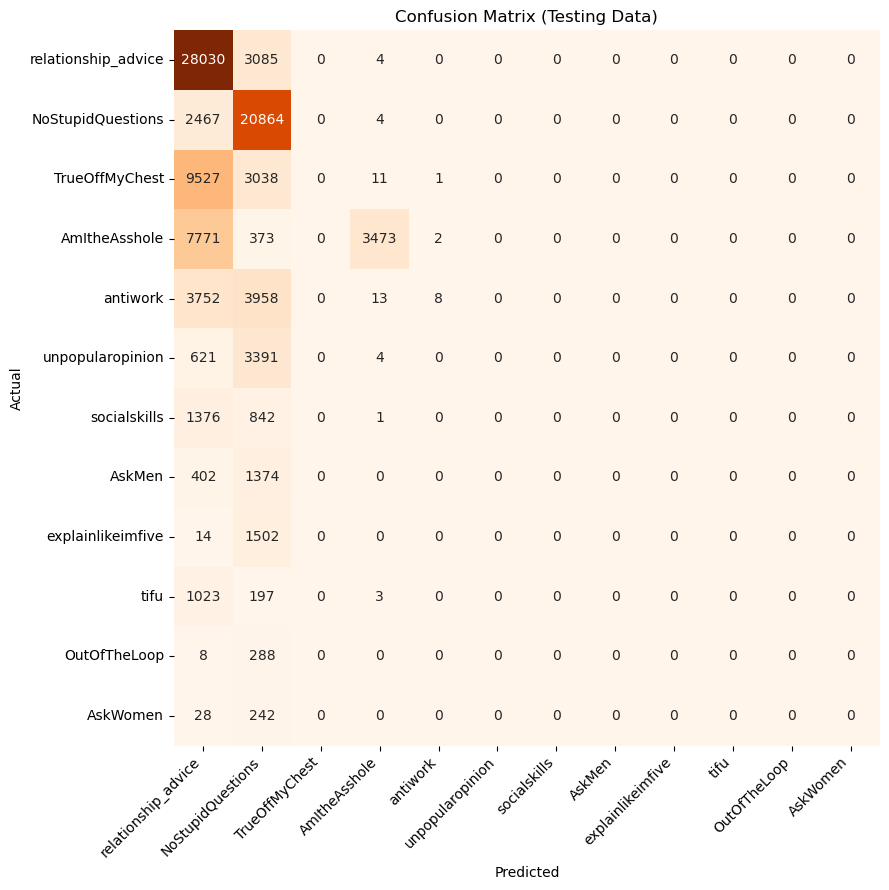

In [12]:
plt.figure(figsize = (9, 9))
sns.heatmap(cm_test.to_numpy(), annot = True, fmt = 'd', cmap = 'Oranges', cbar = False,
            xticklabels = cm_test.columns,
            yticklabels = cm_test.columns)
plt.xlabel('Predicted'); plt.ylabel('Actual'); plt.title('Confusion Matrix (Testing Data)');
plt.xticks(rotation = 45, ha = 'right')
plt.tight_layout()
plt.savefig('../../website-source/img/ml-plots/random-forest-cv-test-cm.png')
plt.show()

### Random Forest Evaluation Metrics

In [13]:
# read in the evaluation metrics
eval_df = pd.read_csv('../../data/ml-data/matt-submissions-cv-eval-metrics.csv')
eval_df

,dataset,metric,value
0,train,accuracy,0.537573
1,test,accuracy,0.536096
2,train,f1,0.423700
3,test,f1,0.421553
4,train,precision,0.483257
5,test,precision,0.464678
6,train,recall,0.537573
7,test,recall,0.536096
8,train,tprate,0.537573
9,test,tprate,0.536096


In [14]:
domain_ = ['train', 'test']
range_ = ['#ff4500', '#7a9299'] # orca: 1b2426

# create the selection and color scheme for interaction
selection = alt.selection_single(fields = ['dataset'], name = 'Random')
color = alt.condition(selection,
                      alt.Color('dataset:N', scale=alt.Scale(domain=domain_, range=range_)),
                      alt.value('lightgray'))

# create the figure
bar = (alt.Chart(eval_df, width = 150)
 .mark_bar()
 .encode(y = alt.Y('value:Q', scale = alt.Scale(domain=[0, 1])),
         x = alt.X('dataset:N', sort = ['train', 'test']),
         color = color,
         column = alt.Column('metric:N', header = alt.Header(labelAngle = 0, labelOrient = 'top'))
        )
).add_selection(selection)

bar.title = 'Random Forest Evaluation Metrics'
bar.encoding.x.title = 'Dataset'
bar.encoding.y.title = 'Evaluation'

random_forest_eval = (bar).configure_view(strokeOpacity = 0).configure_axis(
    labelFontSize = 12,
    titleFontSize = 12
).configure_title(
    fontSize = 16
)

random_forest_eval

/Users/matthewmoriarty/opt/anaconda3/envs/anly503/lib/python3.10/site-packages/altair/utils/core.py:317: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for col_name, dtype in df.dtypes.iteritems():


alt.Chart(...)

In [15]:
# save off to HTML for use in visualizations page
random_forest_eval.save('../../website-source/img/ml-plots/random-forest-eval.html')